In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [4]:
def import_iris():
    irisdata = pd.read_csv(r"C:\Users\VG\Desktop\cmpe255Labs\iris.csv", header = None)
    
    # Assign colum names to the dataset

    irisdata.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

    # Read dataset to pandas dataframe
     
    return irisdata

iris_data = import_iris()

iris_data.head() 

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.shape

(150, 5)

In [6]:
# process
X = iris_data.drop(['Class'], axis=1)  
y = iris_data['Class']  


In [7]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object

In [35]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [10]:
X_train.shape

(120, 4)

In [11]:
X_test.shape

(30, 4)

In [43]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


def polynomial_kernel():
    poly_kernel_svm_clf=Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", degree=8,coef0=1,C=5))])
    poly_kernel_svm_clf.fit(X_train, y_train)
    y_predict = poly_kernel_svm_clf.predict(X_test)
    
    print("-----------------------polynomial----------------------")
    print(accuracy_score(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict)) 
    
    
    
#polynomial_kernel()

def gaussian_kernel():
    rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf"))])
    rbf_kernel_svm_clf.fit(X_train, y_train)
    y_predict = rbf_kernel_svm_clf.predict(X_test)
    
    print("-----------------------gaussian----------------------")
    print( accuracy_score(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict)) 
    
    
#gaussian_kernel()



def sigmoid_kernel():
    # TODO
    # Trains, predicts and evaluates the model '''
    rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="sigmoid", degree=8))])
    rbf_kernel_svm_clf.fit(X_train, y_train)
    y_predict = rbf_kernel_svm_clf.predict(X_test)
    
    print("-----------------------sigmoid----------------------")
    print( accuracy_score(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict)) 
    
    
    
#sigmoid_kernel()


def test():
    #import_iris()
    polynomial_kernel()
    gaussian_kernel()
    sigmoid_kernel()

test()

-----------------------polynomial----------------------
0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

      micro avg       0.90      0.90      0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
-----------------------gaussian----------------------
0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

      micro avg       0.93      0.93      0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30

[[10  0  0]
 [ 0 10  0]
 [

C:\Users\VG\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


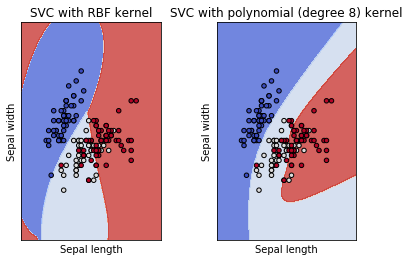

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=8, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with RBF kernel',
          'SVC with polynomial (degree 8) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

    

